<a href="https://colab.research.google.com/github/BairuguniNiharika/Navigating-the-Roads-Ahead-object-Detection-using-Deep-Learning-Techniques/blob/main/Copy_of_task_of_intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA COLLECTION

In [ ]:
import pandas as pd
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
g_f=pd.read_csv("gossipcop_fake.csv")
g_r=pd.read_csv("gossipcop_real.csv")
p_f=pd.read_csv("politifact_fake.csv")
p_r=pd.read_csv("politifact_fake.csv")

# TEXT PREPROCESSING

In [ ]:
import pandas as pd
import re
import string
from sklearn.preprocessing import LabelEncoder

def clean_text(text):
    """Cleans text data by removing punctuation, extra whitespace, and converting to lowercase."""
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\s+', ' ', text).strip()
    return text

def normalize_text(text):
    """Normalizes text by removing special characters, numbers, and converting to lowercase."""
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub('\s+', ' ', text).strip()
    return text


def clean_dataframe(df, text_columns, categorical_columns=None):
    """Cleans a Pandas DataFrame, including text normalization and handling categorical data.

    Args:
        df: The Pandas DataFrame to clean.
        text_columns: A list of column names containing text data.
        categorical_columns: A list of column names containing categorical data.

    Returns:
        A cleaned Pandas DataFrame.
    """

    for col in text_columns:
        df[col] = df[col].apply(clean_text)
        df[col] = df[col].apply(normalize_text)

    if categorical_columns:
        for col in categorical_columns:

            df[col] = df[col].fillna(df[col].mode()[0])

            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])

    df = df.dropna()
    df = df.drop_duplicates()
    return df

# Example usage:
data = {'text1': ['Hello!!! world 123', 'Another. sentence, with numbers 456', None, '   extra   spaces  '],
        'text2': ['More text & symbols @#$', 'A final example.', '',''],
        'category': ['A', 'B', 'A', None],
        'value': [1,2,3,4]}
df = pd.DataFrame(data)

text_cols = ['text1', 'text2']
categorical_cols = ['category']

cleaned_df = clean_dataframe(df, text_cols, categorical_cols)
print(cleaned_df)


cleaned_df.to_csv("cleaned_data.csv", index=False)


df_from_csv = pd.read_csv("cleaned_data.csv")
print("\nData read from CSV:")
print(df_from_csv)

                           text1              text2  category  value
0                    hello world  more text symbols         0      1
1  another sentence with numbers    a final example         1      2
2                                                           0      3
3                   extra spaces                            0      4

Data read from CSV:
                           text1              text2  category  value
0                    hello world  more text symbols         0      1
1  another sentence with numbers    a final example         1      2
2                            NaN                NaN         0      3
3                   extra spaces                NaN         0      4


<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
C:\Users\shrut\AppData\Local\Temp\ipykernel_12676\409031320.py:12: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text).strip()  # Remove extra whitespace
C:\Users\shrut\AppData\Local\Temp\ipykernel_12676\409031320.py:21: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text).strip() # Remove extra whitespace


# INSTALLING SpaCy  

In [ ]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install --upgrade pip

  Using cached pip-24.3.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\Users\shrut\anaconda3\python.exe -m pip install --upgrade pip


In [ ]:
!pip install --upgrade pip

  Using cached pip-24.3.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-24.3.1-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\Users\shrut\anaconda3\python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load datasets and check column names
def load_and_check_datasets():
    # Load datasets
    gossip_fake = pd.read_csv("gossipcop_fake.csv")
    gossip_real = pd.read_csv("gossipcop_real.csv")
    politifact_fake = pd.read_csv("politifact_fake.csv")
    politifact_real = pd.read_csv("politifact_real.csv")

    # Print columns for each dataset to inspect the structure
    print("Columns in gossip_fake:", gossip_fake.columns)
    print("Columns in gossip_real:", gossip_real.columns)
    print("Columns in politifact_fake:", politifact_fake.columns)
    print("Columns in politifact_real:", politifact_real.columns)

    # Return the datasets for further processing
    return gossip_fake, gossip_real, politifact_fake, politifact_real

# Function to test dataset for missing values and correct column names
def test_dataset(df, expected_columns):
    # Check for missing values
    missing_values = df.isnull().sum()
    print("Missing values in dataset:", missing_values)

    # Check if the dataset contains the expected columns
    if not all(col in df.columns for col in expected_columns):
        raise ValueError(f"Dataset is missing expected columns: {expected_columns}")
    else:
        print(f"All expected columns are present: {expected_columns}")

# Example usage
    if _name_ == "_main_":
        gossip_fake, gossip_real, politifact_fake, politifact_real = load_and_check_datasets()

    # Define expected columns for each dataset
        expected_columns_gossip = ["id",	"news_url"	,"title","tweet_ids"]  # Replace with actual expected columns
        expected_columns_politifact = ['id', 'news_url', 'title', 'tweet_ids']  # Replace with actual expected columns

    # Test datasets
    test_dataset(gossip_fake, expected_columns_gossip)
    test_dataset(gossip_real, expected_columns_gossip)
    test_dataset(politifact_fake, expected_columns_politifact)
    test_dataset(politifact_real, expected_columns_politifact)

In [ ]:
g_f=pd.read_csv("gossipcop_fake.csv")
g_r=pd.read_csv("gossipcop_real.csv")
p_f=pd.read_csv("politifact_fake.csv")
p_r=pd.read_csv("politifact_fake.csv")

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip install --upgrade pip

# NAMED ENTITY RECOGNITION(NER)

In [ ]:

import pandas as pd
import SpaCy

def load_and_check_datasets():
    gossip_fake = pd.read_csv("gossipcop_fake.csv")
    gossip_real = pd.read_csv("gossipcop_real.csv")
    politifact_fake = pd.read_csv("politifact_fake.csv")
    politifact_real = pd.read_csv("politifact_fake.csv")

    return gossip_fake, gossip_real, politifact_fake, politifact_real


def test_dataset(df, expected_columns):

    if df.isnull().values.any():
        print("Missing values detected.")
        print(df.isnull().sum())
    else:
        print("No missing values detected.")


    missing_columns = [col for col in expected_columns if col not in df.columns]
    if missing_columns:
        print(f"Dataset is missing expected columns: {missing_columns}")
    else:
        print("All expected columns are present.")


gossip_fake, gossip_real, politifact_fake, politifact_real = load_and_check_datasets()


expected_columns_gossip = ['title', 'content', 'label']
expected_columns_politifact = ['title', 'content', 'label']


test_dataset(gossip_fake, expected_columns_gossip)
test_dataset(gossip_real, expected_columns_gossip)
test_dataset(politifact_fake, expected_columns_politifact)
test_dataset(politifact_real, expected_columns_politifact)




Missing values detected.
id             0
news_url     256
title          0
tweet_ids    188
dtype: int64
Dataset is missing expected columns: ['content', 'label']
Missing values detected.
id              0
news_url       13
title           0
tweet_ids    1058
dtype: int64
Dataset is missing expected columns: ['content', 'label']
Missing values detected.
id            0
news_url      4
title         0
tweet_ids    40
dtype: int64
Dataset is missing expected columns: ['content', 'label']
Missing values detected.
id            0
news_url      4
title         0
tweet_ids    40
dtype: int64
Dataset is missing expected columns: ['content', 'label']


In [ ]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [ ]:

!pip install --upgrade spacy

# FEATURE ENGINEERING

# SELECTING SCORES USING VADER

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shrut\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:




   import nltk
   from nltk.sentiment.vader import SentimentIntensityAnalyzer


   nltk.download('vader_lexicon')


   sia = SentimentIntensityAnalyzer()


   text = 'new articles'


   sentiment_scores = sia.polarity_scores(text)

   print(sentiment_scores)





{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shrut\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


# PREDICTIVE MODELING

In [ ]:


import pandas as pd
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy
from sklearn.model_selection import train_test_split


def load_and_label_datasets():
    politifact_real = pd.read_csv('politifact_real.csv')
    politifact_fake = pd.read_csv('politifact_fake.csv')
    gossipcop_real = pd.read_csv('gossipcop_real.csv')
    gossipcop_fake = pd.read_csv('gossipcop_fake.csv')


    politifact_real['sentiment'] = 'real'
    politifact_fake['sentiment'] = 'fake'
    gossipcop_real['sentiment'] = 'real'
    gossipcop_fake['sentiment'] = 'fake'


    combined_dataset = pd.concat([
        politifact_real[['title', 'sentiment']],
        politifact_fake[['title', 'sentiment']],
        gossipcop_real[['title', 'sentiment']],
        gossipcop_fake[['title','sentiment']]
    ])


    combined_dataset = combined_dataset.dropna(subset=['title'])


    combined_dataset = combined_dataset.sample(frac=1, random_state=42).reset_index(drop=True)
    return combined_dataset


def document_features_simple(words):
    return {word: True for word in words.split()}


def main():
    nltk.download('punkt', quiet=True)


    dataset = load_and_label_datasets()


    train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)


    train_set = [(document_features_simple(row['title']), row['sentiment']) for _, row in train_data.iterrows()]
    test_set = [(document_features_simple(row['title']), row['sentiment']) for _, row in test_data.iterrows()]


    classifier = NaiveBayesClassifier.train(train_set)


    print("Accuracy:", accuracy(classifier, test_set))


    example_text = "This is the best news ever"

In [ ]:
pip install pandas spacy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


# VISUALIZATION

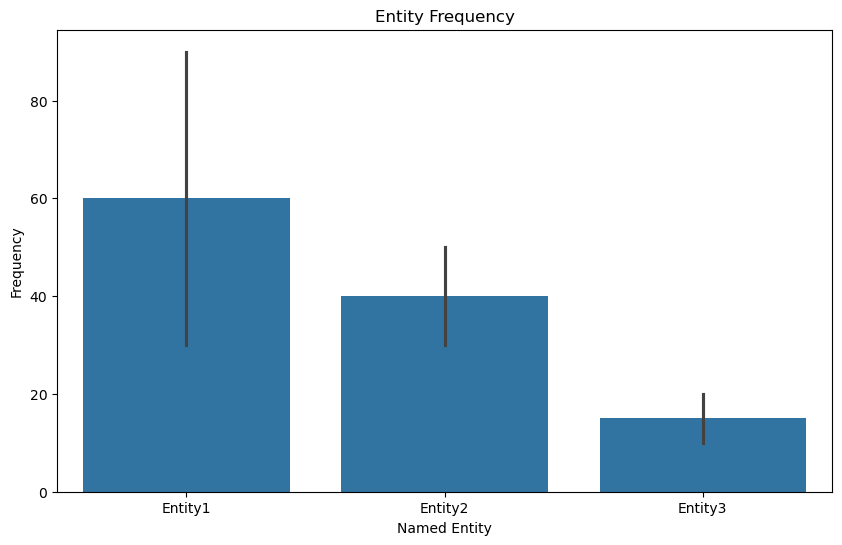

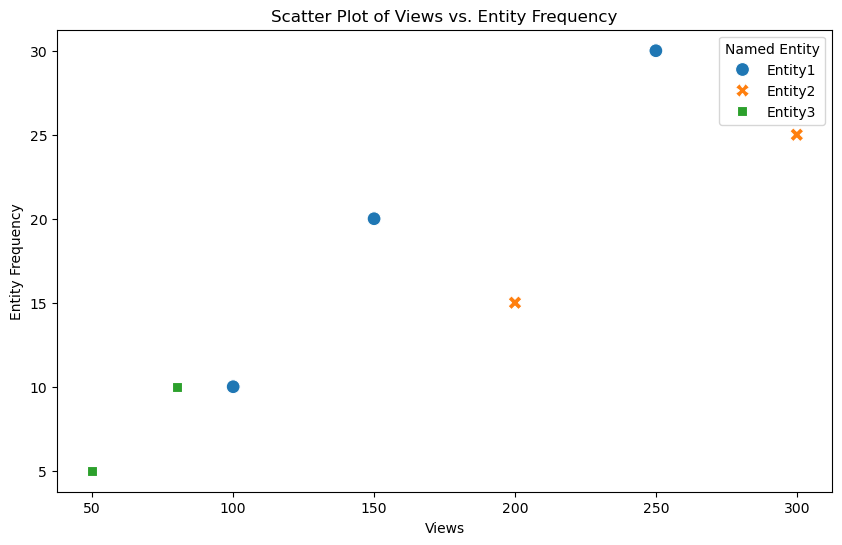

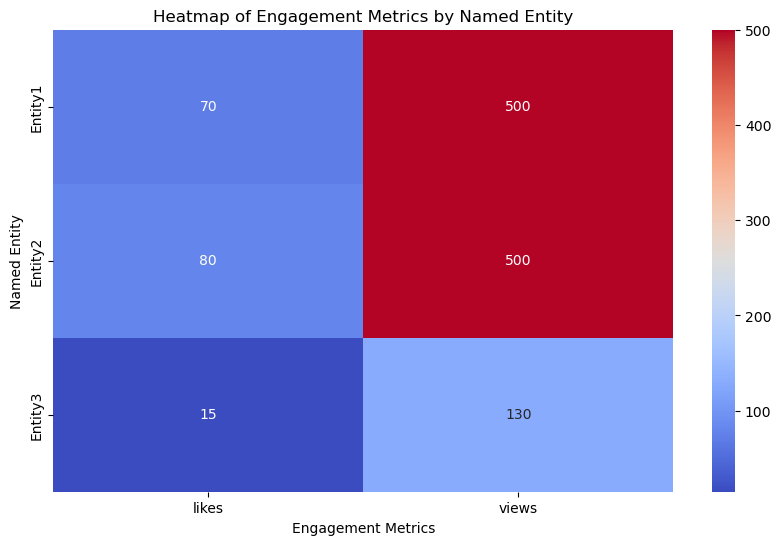

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = {
    'entity': ['Entity1', 'Entity2', 'Entity3', 'Entity1', 'Entity2', 'Entity3', 'Entity1'],
    'frequency': [10, 15, 5, 20, 25, 10, 30],
    'views': [100, 200, 50, 150, 300, 80, 250],
    'likes': [10, 30, 5, 20, 50, 10, 40],
}

df = pd.DataFrame(data)


plt.figure(figsize=(10, 6))
sns.barplot(x='entity', y='frequency', data=df, estimator=sum)
plt.title('Entity Frequency')
plt.xlabel('Named Entity')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x='views', y='frequency', data=df, hue='entity', style='entity', s=100)
plt.title('Scatter Plot of Views vs. Entity Frequency')
plt.xlabel('Views')
plt.ylabel('Entity Frequency')
plt.legend(title='Named Entity')
plt.show()


engagement_data = df.pivot_table(index='entity', values=['views', 'likes'], aggfunc='sum')
plt.figure(figsize=(10, 6))
sns.heatmap(engagement_data, annot=True, cmap='coolwarm', fmt='g')
plt.title('Heatmap of Engagement Metrics by Named Entity')
plt.xlabel('Engagement Metrics')
plt.ylabel('Named Entity')
plt.show()


